# World Happiness Data Analysis
First part heavily based on: https://www.kaggle.com/sarahvch/investigating-happiness-with-python/notebook

In [1]:
%pip install pandas numpy matplotlib seaborn scipy plotly


Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Read in the data for 2015

In [3]:
df2015 = pd.read_csv("2015.csv")
df2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df2015.tail(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


# Plot the Happiness Distribution

4.747999999999999


(array([ 3.,  4., 14., 13., 21., 24., 12., 24.,  8., 11., 11., 13.]),
 array([2.839     , 3.23466667, 3.63033333, 4.026     , 4.42166667,
        4.81733333, 5.213     , 5.60866667, 6.00433333, 6.4       ,
        6.79566667, 7.19133333, 7.587     ]),
 <BarContainer object of 12 artists>)

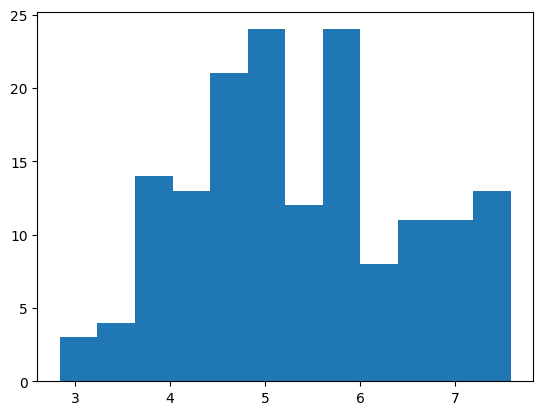

In [5]:
score = df2015["Happiness Score"].max() - df2015["Happiness Score"].min()
print(score)
plt.hist(df2015["Happiness Score"],bins=round(score*2.5))

# Plot the correlations

                               Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992105   
Happiness Score                     -0.992105         1.000000   
Standard Error                       0.158516        -0.177254   
Economy (GDP per Capita)            -0.785267         0.780966   
Family                              -0.733644         0.740605   
Health (Life Expectancy)            -0.735613         0.724200   
Freedom                             -0.556886         0.568211   
Trust (Government Corruption)       -0.372315         0.395199   
Generosity                          -0.160142         0.180319   
Dystopia Residual                   -0.521999         0.530474   

                               Standard Error  Economy (GDP per Capita)  \
Happiness Rank                       0.158516                 -0.785267   
Happiness Score                     -0.177254                  0.780966   
Standard Error                       1.000000   

<Axes: >

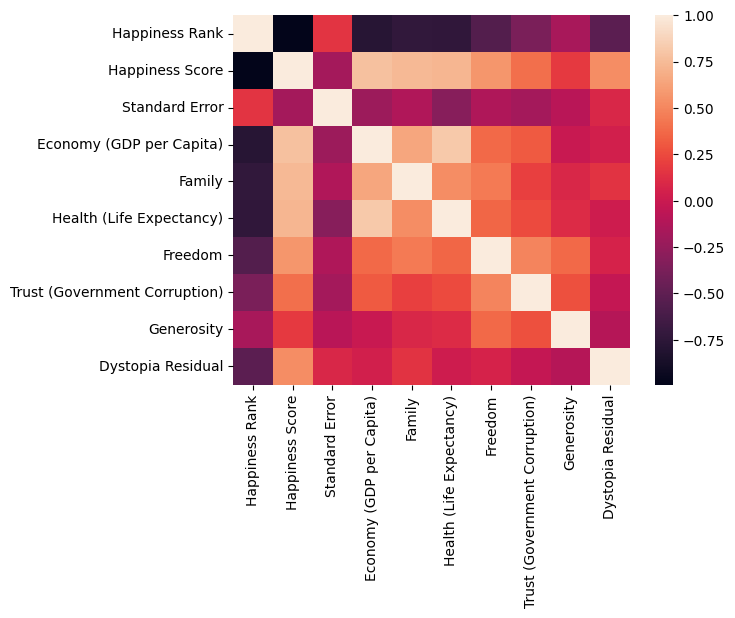

In [6]:
print(df2015.corr(numeric_only=True))
sns.heatmap(df2015.corr(numeric_only=True))

# Regional Happiness Ranking

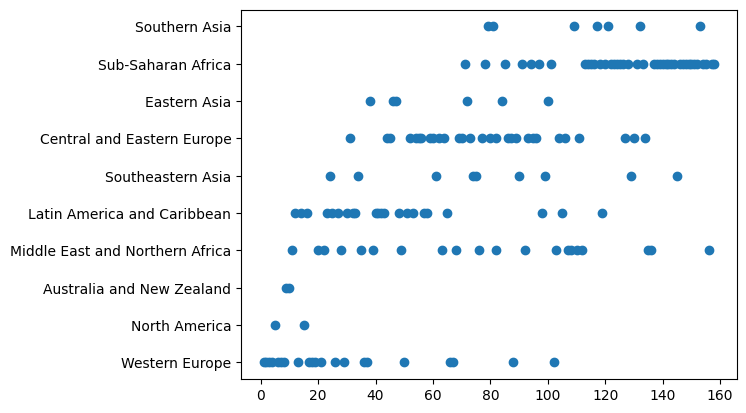

In [7]:
plt.scatter(df2015["Happiness Rank"],df2015["Region"])

# Plot happiness on a map

# Investigate Predictions of Future Happiness
First load the 2016 and 2017 data

In [8]:
df2016 = pd.read_csv("2016.csv")
df2017 = pd.read_csv("2017.csv")
df2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [9]:
df2017.columns = df2017.columns.str.replace("."," ")
df2017.head()

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy GDP per Capita,Family,Health Life Expectancy,Freedom,Generosity,Trust Government Corruption,Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


## Check Austria's position over the 3 years (for fun)

In [10]:
print(df2015.loc[df2015["Country"] == "Austria"]["Happiness Score"])
print(df2016.loc[df2016["Country"] == "Austria"]["Happiness Score"])
print(df2017.loc[df2017["Country"] == "Austria"]["Happiness Score"])

12    7.2
Name: Happiness Score, dtype: float64
11    7.119
Name: Happiness Score, dtype: float64
12    7.006
Name: Happiness Score, dtype: float64


## Get the data into a state fit to analyse
Check how many countries are in each list

In [11]:
print(df2015.iloc[-1][2])
print(df2016.iloc[-1][2])
print(df2017.iloc[-1][1])
print(df2015.shape)

158
157
155
(158, 12)


C:\Users\jakob\AppData\Local\Temp\ipykernel_23736\1065643381.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\jakob\AppData\Local\Temp\ipykernel_23736\1065643381.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\jakob\AppData\Local\Temp\ipykernel_23736\1065643381.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Which countries are in 2015 but not in 2016?

In [12]:
print(set(df2015["Country"])- set(df2016["Country"]))

{'Somaliland region', 'Mozambique', 'Lesotho', 'Djibouti', 'Central African Republic', 'Swaziland', 'Oman'}


Which countries are in 2016 but not in 2015?

In [13]:
print(set(df2016["Country"])- set(df2015["Country"]))

{'Namibia', 'Somalia', 'South Sudan', 'Somaliland Region', 'Belize', 'Puerto Rico'}


Which countries are in 2015 but not in 2017?

In [14]:
print(set(df2015["Country"])- set(df2017["Country"]))

{'Suriname', 'Somaliland region', 'Comoros', 'Djibouti', 'Laos', 'Hong Kong', 'Taiwan', 'Swaziland', 'Oman'}


## Create a list of 2015 countries removing those that are not in the 2016 and 2017 lists

In [15]:
df2=df2015
df1=df2[~df2['Country'].isin(np.setdiff1d(df2015['Country'],df2016['Country']))]
df=df1[~df1['Country'].isin(np.setdiff1d(df2015['Country'],df2017['Country']))]
print (df2.shape[0], df1.shape[0], df.shape[0])

158 151 146


In [27]:
df2015ab=df
df2016ab=df2016[df2016['Country'].isin(df['Country'])]
df2017ab=df2017[df2017['Country'].isin(df['Country'])]
print (df2015ab.shape[0], df2016ab.shape[0], df2017ab.shape[0])
df2015 = df2015ab
df2016 = df2016ab
df2017 = df2017ab

df2015sort = df2015.sort_values("Country")
df2016sort = df2016.sort_values("Country")
df2017sort = df2017.sort_values("Country")

146 146 146


## Check plots of ranks and scores over years
### 2015 to 2016

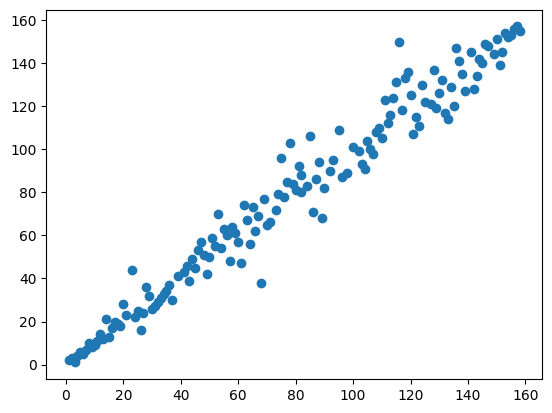

In [17]:
plt.scatter(df2015sort["Happiness Rank"],df2016sort["Happiness Rank"])



### 2015 to 2017

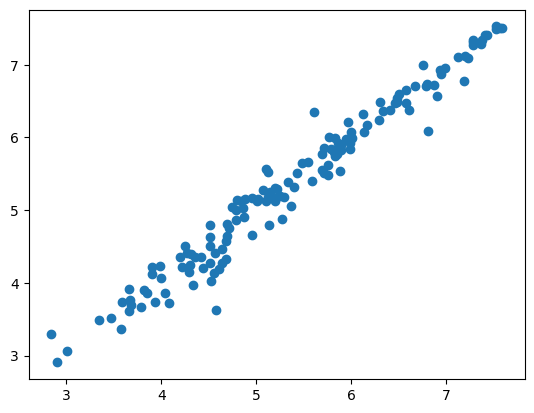

In [18]:
plt.scatter(df2015sort["Happiness Score"],df2016sort["Happiness Score"])

Point going from position 23 in 2015 to position 82 in 2017 is Venezuela

## Use Linear regression to predict future Happiness Score (2016, 2017) based on 2015 Happiness Score
### Start with 2015 to predict 2016

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df2015sort["Happiness Score"].values.reshape(-1, 1)
y = df2016sort["Happiness Score"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)
regressor = LinearRegression().fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(f"Mean squared error: {metrics.mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {metrics.r2_score(y_test, y_pred):.2f}")

Mean squared error: 0.08
Coefficient of determination: 0.94


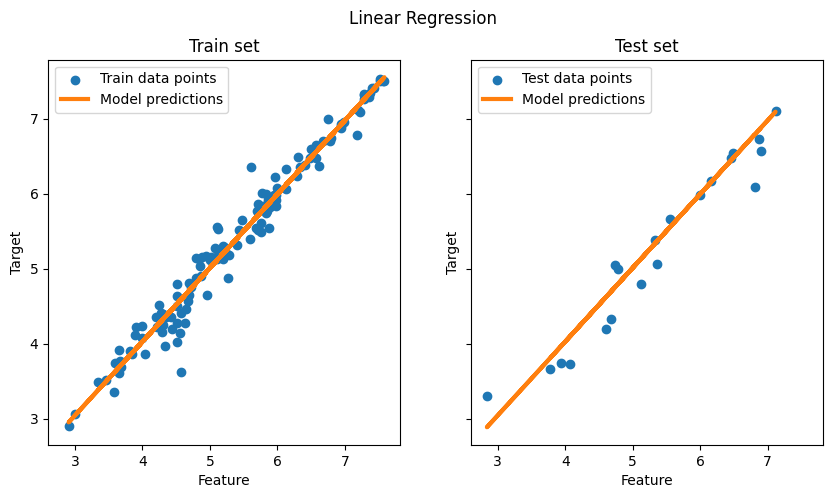

In [25]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

### Now 2015 to predict 2017

In [31]:
X = df2015sort["Happiness Score"].values.reshape(-1, 1)
y = df2017sort["Happiness Score"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)
regressor = LinearRegression().fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(f"Mean squared error: {metrics.mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {metrics.r2_score(y_test, y_pred):.2f}")

Mean squared error: 0.25
Coefficient of determination: 0.81


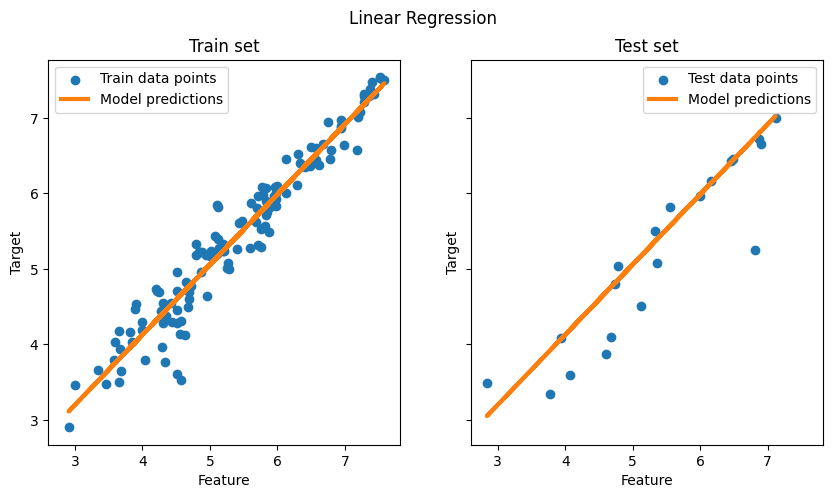

In [32]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

Black is line for 2015-2017, green is line for 2015-2016. Notice that the 2015-2017 line is less steep than the 2015-2016 one.

Predicting further into the future produces worse predictions (not surprising)!